In [1]:
import warnings
warnings.filterwarnings(action='once')

# sklearn 提供了许多函数用于 fetch ML dataset，如MNIST
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X,y = mnist['data'],mnist['target']

In [3]:
# MNIST 已经将train/test 分好了，只需要shuffle即可
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print(X_train.shape)
print(y_test.shape)

(60000, 784)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

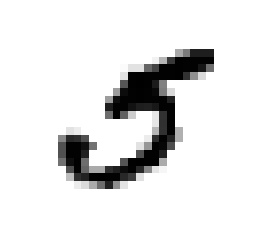

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [5]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [6]:
############################################# 训练一个 Binary Classifer ########################################
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train_5)
print(sgd_clf.predict(X_train[100:110]))
y_train[100:110]


G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[False False False False False False False False False False]


array([0., 3., 4., 6., 1., 9., 1., 7., 8., 4.])

In [7]:
##############################################  评估模型的好坏——（1）交叉验证  ##############################################
# 注意：cross_val_score 函数能控制的较少，通常自己定义一个cv函数来实现功能
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold  #分层抽样交叉验证
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)



In [8]:
for train_index, test_index in skfolds.split(X_train,y_train_5):
    print('train_index',train_index,'\t','test_index',test_index)
    break

train_index [19997 19998 19999 ... 59997 59998 59999] 	 test_index [    0     1     2 ... 20003 20015 20023]


In [9]:
# test_index.shape
# y_train[train_index]
# (X_test[10000])

In [10]:
for train_index, val_index in skfolds.split(X_train,y_train_5): #上面选择n_splits = 3 所以生成器要生成三次
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_val_folds = X_train[val_index]
    y_val_folds = y_train_5[val_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_val_folds)
    n_correct = sum(y_pred == y_val_folds)
    print('accuracy: ',n_correct/len(X_val_folds))

G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.9612


G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.94325


G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.95175


In [11]:
# 对比：直接使用cross_val_score()
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5,cv=3, scoring='accuracy')

G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn

array([0.95615, 0.95695, 0.9574 ])

In [12]:
############################################### 初次尝试： 定义自己的Classfier ###############################################
########  功能： 分类出不是5的类别 #################
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool) #预测值全为False...
never_5_clf = Never5Classifier()
print(cross_val_score(never_5_clf,X_train_folds,y_train_folds,cv=5,scoring='accuracy'))
print(never_5_clf.predict(y_val_folds[1:30]).reshape([1,-1]))
print(y_train_folds[1:30])
y_train[train_index][1:30]
# 说明用准确率并不一定很好的measure模型的好坏。尤其是（skewed datasets）

[0.91     0.911375 0.905375 0.9135   0.908   ]
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


array([1., 6., 0., 7., 4., 2., 8., 7., 6., 7., 0., 4., 9., 4., 0., 1., 8.,
       6., 1., 8., 8., 2., 3., 8., 1., 1., 8., 3., 3.])

In [13]:
# BaseEstimator provides among other things a default implementation for the get_params and set_params methods,
# see the source code. This is useful to make the model grid search-able with GridSearchCV for automated parameters tuning
# and behave well with others when combined in a Pipeline.


In [14]:
###################################################### 继续评估模型好坏——Confusion Matrix ##################################################
## 为了获得Confusion Matrix，首先要计算出一系列predictions
from sklearn.model_selection import cross_val_predict #相当于返回在整个X_trian上的prediction
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
print(y_train_pred[50:60])
## 获取Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)


G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn

[False False False False False False False False False False]


array([[53577,  1002],
       [ 1418,  4003]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred) #f1 score

0.7998001998001998
0.738424644899465


0.7678879723767504

In [16]:
# 使用figure3-3中的方法：通过每个数字的score和阈值相比较，大于阈值的判断为TP
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 300000 #sgd中默认的阈值是零，这里提高了阈值
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

[3670.91473468]


array([False])

In [17]:
####################################   如何选择恰当的阈值？——交叉验证一下 ############################

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_5, cv = 3, method='decision_function')
print(y_scores.shape)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) #返回在所有阈值可能下的precision和recall？
# 注意：threshold 的 shape 比前两者要小1

G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
G:\Python\Anaconda\lib\site-packages\sklearn

(60000,)


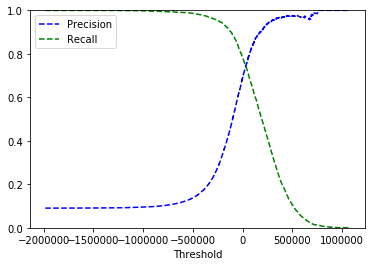

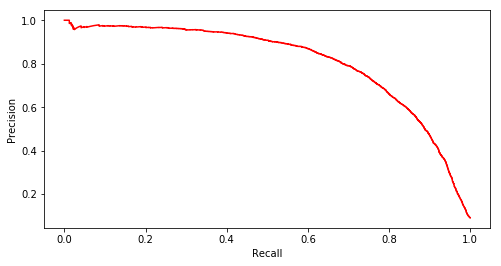

In [19]:
#  绘制 precision-recall 曲线 从而 tradeoff 精确度和召回率
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'b--', label = 'Precision')
    plt.plot(threshold, recall[:-1],'g--',label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])
    plt.ion()
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions,'r')  #非常简单..
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [20]:
# 假定现在任务要求90% precision
thres_ind = np.argmin(np.float32(precisions-0.9)**2)
thres = thresholds[thres_ind]
print(thres)


176468.25413699436


In [21]:
y_train_pred_90 = y_scores>thres
# print(sum(y_train_pred_90 == y_train_5)/len(y_train_5))
print(precision_score(y_train_5, y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)

0.9003807106598984


0.5235196458218041

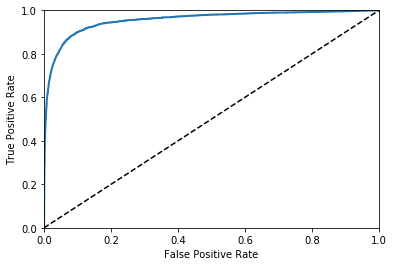

In [22]:
###################################  另一种常用的工具——ROC曲线 #############################
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')  #绘制中间的虚线
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr,'didiu') 

In [23]:
# 计算ROC曲线的面积AUC（Area under the curve）
from sklearn.metrics import roc_auc_score
area_ratio = roc_auc_score(y_train_5,y_scores) #注意这几个metrics输入的参数都是由cross_val_predict计算出来的 decision_function的值
print(area_ratio)

0.9557513572920716


In [24]:
#######################################################  现在训练一个随机森林分类器，来比较SGD #########################
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
# roc_area = roc_auc_score(y_train_5, y_proba_forest)
# 注意：计算ROC曲线时需要用的是score,所以要把proba转换成scores——最简单的方式是用positive class 的概率


G:\Python\Anaconda\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [25]:
y_proba_forest[1:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

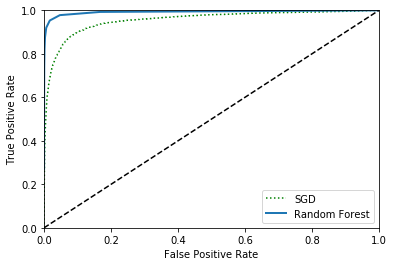

In [26]:
y_scores_forest = y_proba_forest[:,1] #注意第二列才是positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr,tpr,'g:',label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, label = 'Random Forest')
plt.legend(loc = 'lower right')
# plot_roc_curve(fpr,tpr,label='SGD')

In [27]:
roc_auc_score(y_train_5,y_scores_forest)

0.9925802851623796

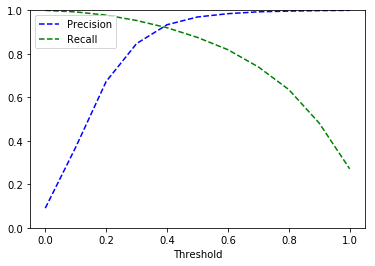

In [28]:
forest_precision, forest_recall, forest_thresh = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(forest_precision,forest_recall,forest_thresh)

In [29]:
  ##########################################################################################################################
#######################################     训练一个多分类器  ##############################################################

In [30]:
# 有些算法，如随机森林和朴素贝叶斯分类器可以直接处理多个分类。SVM 等则是严格的二分类器。然而可以通过多种策略实现多分类
# ① One-vs-All(Rest) ② One -vs- One
# 首先使用 SGDClassifier
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

G:\Python\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [31]:
# 实际上sgd 训练了十个二分类器：可以通过观察 decision_scores看出来
some_digit_scores = sgd_clf.decision_function([some_digit])
print(np.argmax(some_digit_scores))
sgd_clf.classes_

5


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
# 实现一个one-vs-one的多分类
warnings.filterwarnings('ignore')
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
y_pred = ovo_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96       980
        1.0       0.99      0.96      0.97      1135
        2.0       0.94      0.85      0.90      1032
        3.0       0.84      0.92      0.88      1010
        4.0       0.93      0.95      0.94       982
        5.0       0.92      0.79      0.85       892
        6.0       0.95      0.93      0.94       958
        7.0       0.89      0.95      0.92      1028
        8.0       0.81      0.92      0.86       974
        9.0       0.93      0.89      0.91      1009

avg / total       0.92      0.91      0.91     10000



In [33]:
print(ovo_clf.predict([some_digit]))
ovo_clf.estimators_[5].predict([X_train[1],X_train[2],X_train[3]]) #使用第六个分类器进行预测


[5.]


array([0, 1, 0])

In [34]:
########## 训练一个随机森林分类器
forest_clf.fit(X_train,y_train)
print(forest_clf.predict([X_train[100],X_train[103],X_train[3000]]))
print(y_train[100],y_train[103],y_train[3000])
forest_pred = forest_clf.predict(X_test)

[0. 6. 8.]
0.0 6.0 8.0


In [35]:
print(classification_report(y_test, forest_pred))

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97       980
        1.0       0.98      0.99      0.98      1135
        2.0       0.93      0.95      0.94      1032
        3.0       0.92      0.93      0.92      1010
        4.0       0.94      0.95      0.95       982
        5.0       0.94      0.92      0.93       892
        6.0       0.96      0.96      0.96       958
        7.0       0.96      0.95      0.95      1028
        8.0       0.93      0.91      0.92       974
        9.0       0.94      0.91      0.93      1009

avg / total       0.95      0.95      0.95     10000



In [36]:
print(forest_clf.predict([some_digit]),'\n')
print(forest_clf.predict_proba([some_digit]))
print()
print(np.argmax(forest_clf.predict_proba([some_digit])))

[5.] 

[[0.1 0.  0.  0.1 0.  0.7 0.  0.  0.1 0. ]]

5


In [37]:
### 使用cross_validation 评估模型好坏
cross_val_score(sgd_clf, X_train,y_train,cv = 3, scoring='accuracy')

array([0.8629774 , 0.87894395, 0.85782867])

In [38]:
# 简单的提高模型准确率——scale the features
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
sgd_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),   
])
full_pipeline = FeatureUnion(transformer_list = [
    ('sgd_pipeline', sgd_pipeline),
])
X_train_scaled = full_pipeline.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring='accuracy')

array([0.91026795, 0.9059953 , 0.91308696])

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confu_mtx = confusion_matrix(y_train, y_train_pred)
print(confu_mtx)

[[5736    4   26    8   11   47   43    7   37    4]
 [   2 6462   48   28    6   37    8   10  130   11]
 [  55   38 5335  107   78   22   90   53  165   15]
 [  54   43  129 5363    2  213   39   53  139   96]
 [  22   26   36   11 5370    7   54   30   81  205]
 [  77   42   36  185   78 4583  113   29  184   94]
 [  38   24   49    2   42   76 5629    7   50    1]
 [  30   21   70   32   61    8    6 5789   18  230]
 [  58  152   72  158   13  146   56   25 5038  133]
 [  47   31   27   94  167   25    2  194   78 5284]]


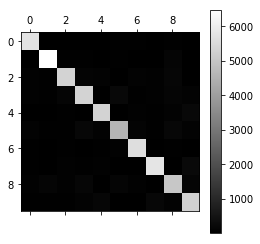

In [40]:
plt.matshow(confu_mtx, cmap = plt.cm.gray)
plt.colorbar()

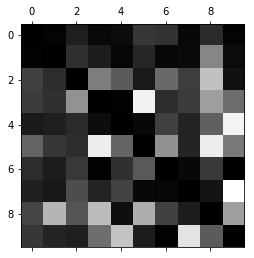

In [41]:
# 将confusion matrix均值化
row_sums = np.sum(confu_mtx,axis=1,keepdims=True)  #若不设置keepdims 则结果为一个向量，不是[10,1] 的矩阵
norm_confu_mtx = confu_mtx/row_sums
# 将对角线填充为0，只关注误差
np.fill_diagonal(norm_confu_mtx, 0)
plt.matshow(norm_confu_mtx,cmap = plt.cm.gray)


In [42]:
np.sum(confu_mtx,axis=1,keepdims=True)

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

(<matplotlib.axes._subplots.AxesSubplot at 0x28e0a7f0f98>, None)

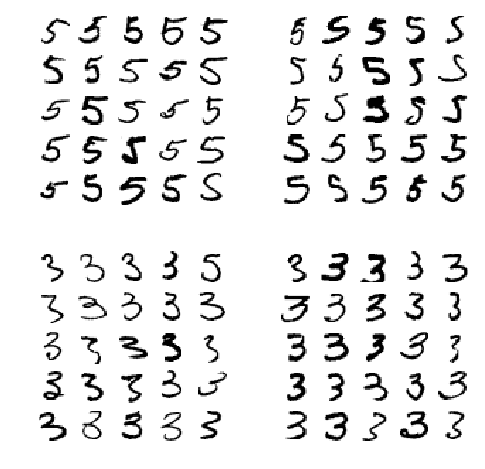

In [43]:
#### 观察confusion matrix 中的误差，然后针对错误分类较多的类别，可以增加额外的预处理步骤 ##############
################  另一种直观的的观察误差的方法： ######################

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances] #转换成100个像素阵
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))      #实现list的reshape
    image = np.concatenate(row_images, axis=0)  
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    

cl_a, cl_b = 5, 3
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]  ####################注意这种索引方式！！！！！！！！！！！！！！！！！！！！！！
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
plt.figure(figsize=(8, 8))
plt.subplot(221),plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222),plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223),plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224),plot_digits(X_bb[:25],images_per_row=5)


In [44]:
##############################################  Multilabel Classfication ##############################################
# 情景：识别一张照片中的多个人脸，要求对于一张图像，输出多个label，如[0,1,1]判断某三个人是否存在
# 引例：
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] #60000 行 2 列，代表每个instance两个label
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])


array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv =2)

In [ ]:
f1_score(y_train, y_train_knn_pred, average = 'macro')